# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
df_equipment = pd.read_csv('russia_losses_equipment.csv')
df_personnel = pd.read_csv('russia_losses_personnel.csv')

# Personnel

In [3]:
df_personnel.head()

date  day  personnel personnel*  POW
0  2022-02-25    2       2800      about    0
1  2022-02-26    3       4300      about    0
2  2022-02-27    4       4500      about    0
3  2022-02-28    5       5300      about    0
4  2022-03-01    6       5710      about  200

In [4]:
df = personnel.set_index('date')[['personnel']]
df.head()

NameError: name 'personnel' is not defined

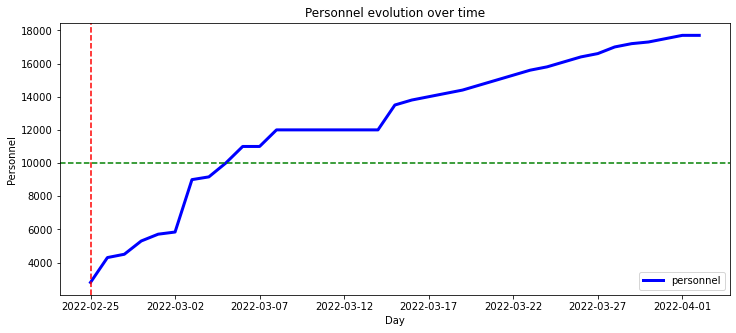

In [10]:
# plt.style.use('fivethirtyeight')
ax = df.plot(color='blue', figsize=(12,5), linewidth=3)
ax.set_xlabel('Day')
ax.set_ylabel('Personnel')
ax.set_title('Personnel evolution over time')
ax.axvline(x='2022-03-31', color='red', linestyle='--')
ax.axhline(y=10000, color='green', linestyle='--')

plt.show()

## Autocorrelation
 If autocorrelation values are close to 0, then values between consecutive observations are not correlated with one another. 
 
Inversely, autocorrelations values close to 1 or -1 indicate that there exists strong positive or negative correlations between consecutive observations, respectively.

In order to help you asses how trustworthy these autocorrelation values are, the plot_acf() function also returns confidence intervals (represented as blue shaded regions). If an autocorrelation value goes beyond the confidence interval region, you can assume that the observed autocorrelation value is statistically significant.


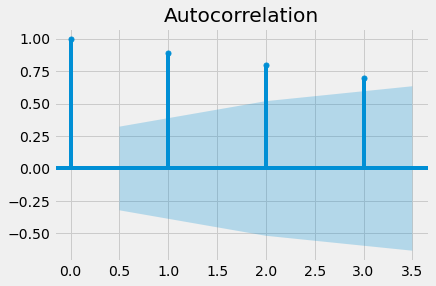

In [11]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots
# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(df['personnel'], lags=3)

# Show plot
plt.show()

## Partial Autocorrelation
If partial autocorrelation values are close to 0, then values between observations and lagged observations are not correlated with one another. Inversely, partial autocorrelations with values close to 1 or -1 indicate that there exists strong positive or negative correlations between the lagged observations of the time series.

The .plot_pacf() function also returns confidence intervals, which are represented as blue shaded regions. If partial autocorrelation values are beyond this confidence interval regions, then you can assume that the observed partial autocorrelation values are statistically significant.

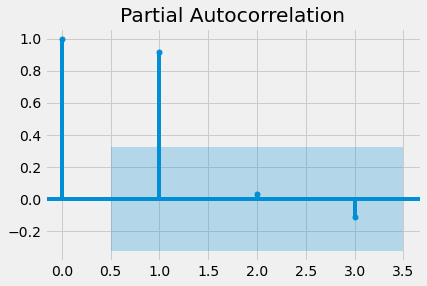

In [12]:
plt.style.use('fivethirtyeight')

# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(df['personnel'], lags=3)

# Show plot
plt.show()

## ARMA

/zhome/48/e/160183/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ValueError: Length of passed values is 974, index implies 21.

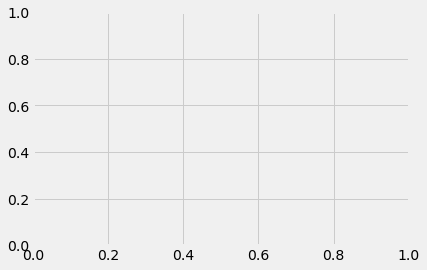

In [40]:
try:
    from statsmodels.tsa.arima_model import ARMA
except ModuleNotFoundError:
    !pip install statsmodels
    
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA', FutureWarning)

mod = ARMA(df_personnel['personnel'], order=(1,0))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

### Changing the time series frequency: resampling

In [15]:
df = df_personnel.set_index('date')

#create monthly
monthly = pd.Series(data=range(37), index=df)
print(monthly)
# upsample: transform freq from quarter => month
# df.as_freq('M')

(2, 2800, about, 0)         0
(3, 4300, about, 0)         1
(4, 4500, about, 0)         2
(5, 5300, about, 0)         3
(6, 5710, about, 200)       4
(7, 5840, about, 200)       5
(8, 9000, about, 200)       6
(9, 9166, about, 200)       7
(10, 10000, about, 216)     8
(11, 11000, about, 232)     9
(12, 11000, more, 259)     10
(13, 12000, about, 284)    11
(14, 12000, about, 360)    12
(15, 12000, more, 371)     13
(16, 12000, more, 389)     14
(17, 12000, more, 389)     15
(18, 12000, more, 389)     16
(19, 12000, more, 389)     17
(20, 13500, about, 389)    18
(21, 13800, about, 389)    19
(22, 14000, about, 405)    20
(23, 14200, about, 405)    21
(24, 14400, about, 405)    22
(25, 14700, about, 405)    23
(26, 15000, about, 405)    24
(27, 15300, about, 411)    25
(28, 15600, about, 412)    26
(29, 15800, about, 412)    27
(30, 16100, about, 412)    28
(31, 16400, about, 412)    29
(32, 16600, about, 421)    30
(33, 17000, about, 421)    31
(34, 17200, about, 430)    32
(35, 17300

# Equipment

In [16]:
df_equipment.head()

date  day  aircraft  helicopter  tank  APC  field artillery  MRL  \
0  2022-02-25    2        10           7    80  516               49    4   
1  2022-02-26    3        27          26   146  706               49    4   
2  2022-02-27    4        27          26   150  706               50    4   
3  2022-02-28    5        29          29   150  816               74   21   
4  2022-03-01    6        29          29   198  846               77   24   

   military auto  fuel tank  drone  naval ship  anti-aircraft warfare  \
0            100         60      0           2                      0   
1            130         60      2           2                      0   
2            130         60      2           2                      0   
3            291         60      3           2                      5   
4            305         60      3           2                      7   

   special equipment  mobile SRBM system  
0                NaN                 NaN  
1                NaN                 NaN  
2                NaN                 NaN  
3                NaN                 NaN  
4                NaN                 NaN

In [17]:
df_equipment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   37 non-null     object 
 1   day                    37 non-null     int64  
 2   aircraft               37 non-null     int64  
 3   helicopter             37 non-null     int64  
 4   tank                   37 non-null     int64  
 5   APC                    37 non-null     int64  
 6   field artillery        37 non-null     int64  
 7   MRL                    37 non-null     int64  
 8   military auto          37 non-null     int64  
 9   fuel tank              37 non-null     int64  
 10  drone                  37 non-null     int64  
 11  naval ship             37 non-null     int64  
 12  anti-aircraft warfare  37 non-null     int64  
 13  special equipment      18 non-null     float64
 14  mobile SRBM system     8 non-null      float64
dtypes: float

In [18]:
df_equipment = df_equipment.set_index('date')
df_equipment.head()

day  aircraft  helicopter  tank  APC  field artillery  MRL  \
date                                                                     
2022-02-25    2        10           7    80  516               49    4   
2022-02-26    3        27          26   146  706               49    4   
2022-02-27    4        27          26   150  706               50    4   
2022-02-28    5        29          29   150  816               74   21   
2022-03-01    6        29          29   198  846               77   24   

            military auto  fuel tank  drone  naval ship  \
date                                                      
2022-02-25            100         60      0           2   
2022-02-26            130         60      2           2   
2022-02-27            130         60      2           2   
2022-02-28            291         60      3           2   
2022-03-01            305         60      3           2   

            anti-aircraft warfare  special equipment  mobile SRBM system  
date                                                                      
2022-02-25                      0                NaN                 NaN  
2022-02-26                      0                NaN                 NaN  
2022-02-27                      0                NaN                 NaN  
2022-02-28                      5                NaN                 NaN  
2022-03-01                      7                NaN                 NaN

## Plots

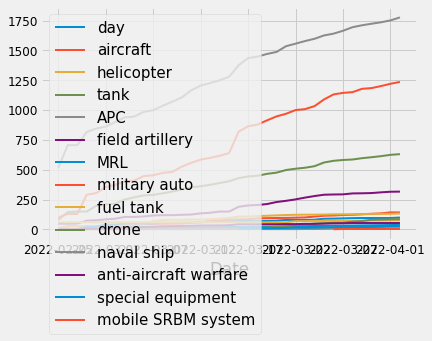

In [29]:
ax = df_equipment.plot(linewidth=2, fontsize=12)

#customization
ax.set_xlabel('Date')
ax.legend(fontsize=15)
plt.show()

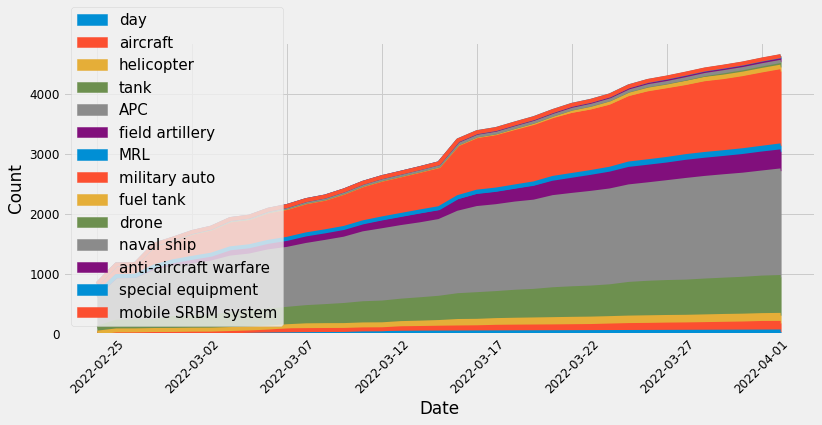

In [28]:
# plot area chart
ax = df_equipment.plot.area(fontsize=12, figsize=(12,5))

#customization
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.legend(fontsize=15)
plt.xticks(rotation=45)

plt.show()

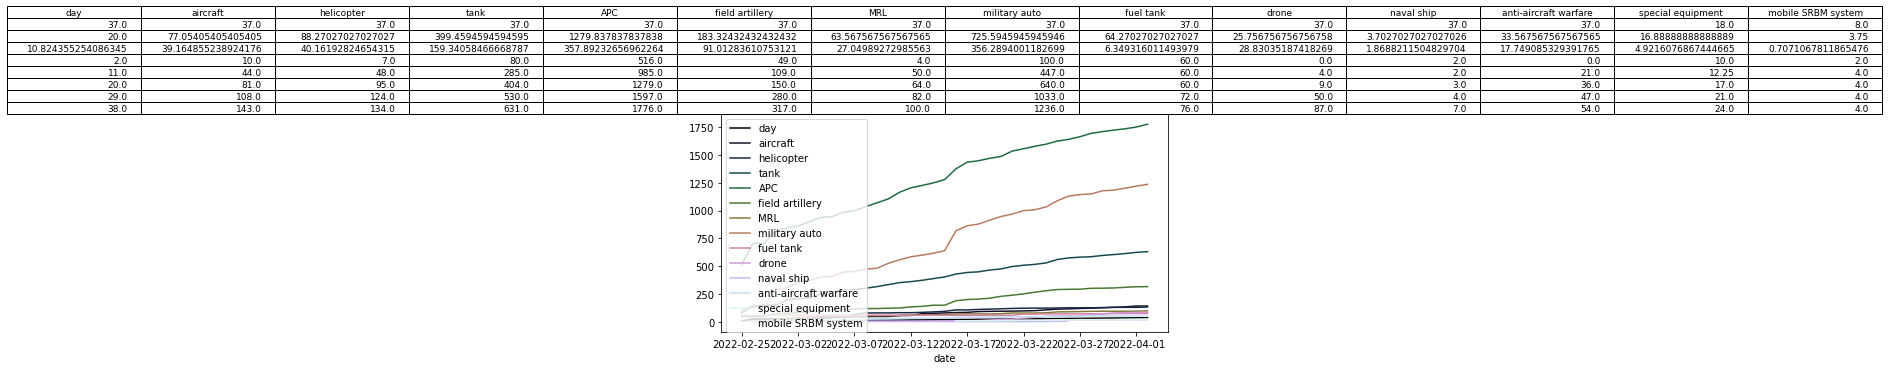

In [55]:
ax = df_equipment.plot(colormap='cubehelix', figsize=(8,4))

df_summary = df_equipment.describe()

ax.table(cellText=df_summary.values, colWidths=[0.3]*len(df_equipment.columns),
        colLabels=df_equipment.columns, loc='top')

plt.show();

In [ ]:
different growth rates

### Subplots

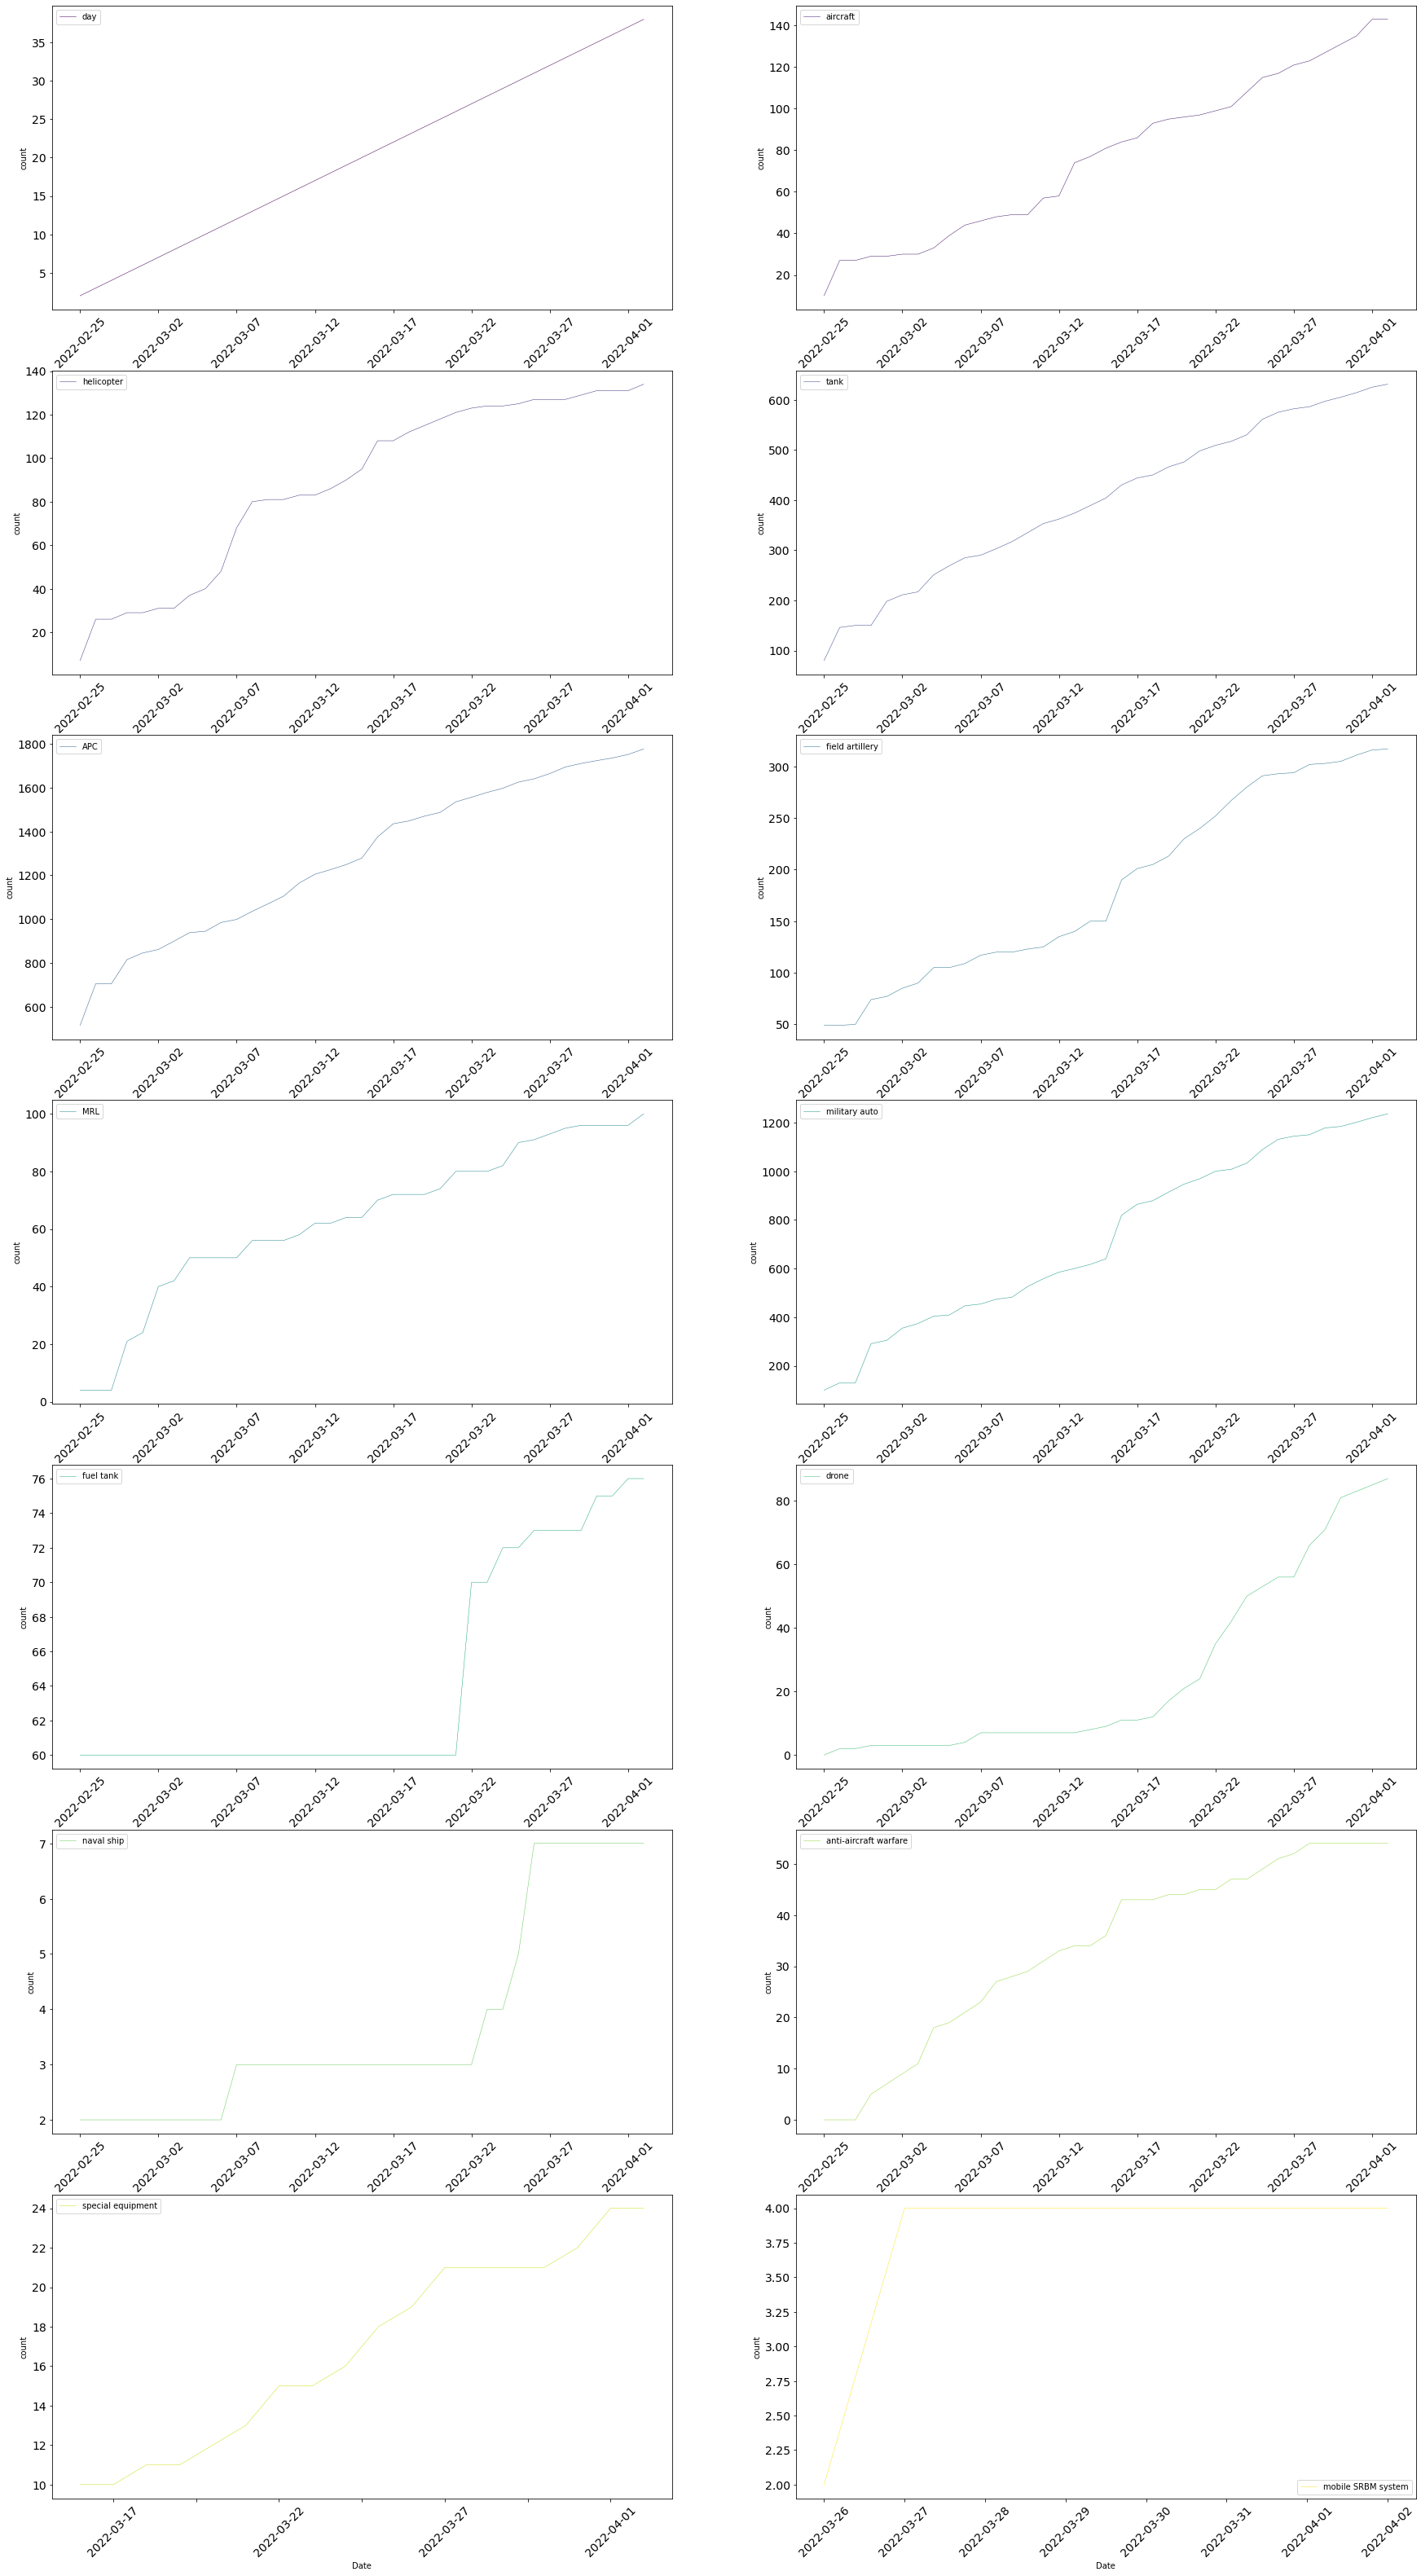

In [79]:
ax = df_equipment.plot(subplots=True, layout = (7, 2), linewidth=0.5, colormap='viridis', fontsize=14,
                         figsize=(30, 25), legend=True, sharex=False, sharey=False, 
                          xlabel='Date', ylabel='count', rot=45)

# ax = df_equipment.plot(colormap='cubehelix', figsize=(12,6))
# #customization
#     ax.set_xlabel('Date')
#     ax.set_ylabel('Count')

plt.subplots_adjust(bottom=0.3, top=2)
plt.show()